## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## ▶️ EDA

In [344]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns
pd.set_option('display.max_columns', None)


In [345]:
df = pd.read_csv('../Datasets/BlackFriday/train.csv')

In [346]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [347]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (550068, 12) | Rows: 550068, Columns: 12


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [349]:
df['Gender'] = df['Gender'].map({'F': 0,'M': 1})
df['Age'] = df['Age'].map({'0-17': 1,'18-25': 2,'26-35': 3,'36-45': 4,'46-50': 5,'51-55': 6,'55+': 7})
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [350]:
dependent_column = ['Purchase']
all_dependent_columns = [column for column in list(df.columns) if column not in dependent_column + ['User_ID']]

print('>>> dependent_column: \n\t', dependent_column)
print('>>> all_dependent_columns: \n\t', all_dependent_columns)

>>> dependent_column: 
	 ['Purchase']
>>> all_dependent_columns: 
	 ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [351]:
df['Age'] = df['Age'].astype(int)
df['Occupation'] = df['Occupation'].astype('O')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Marital_Status'] = df['Marital_Status'].astype('O')
df['Product_Category_1'] = df['Product_Category_1'].astype('O')
df['Product_Category_2'] = df['Product_Category_2'].astype('O')
df['Product_Category_3'] = df['Product_Category_3'].astype('O')

In [352]:
df = df.set_index('User_ID')

In [353]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [354]:
print('>>> All features having null values:', [feature for feature in df.columns if df[feature].isnull().sum()>0])

>>> All features having null values: ['Product_Category_2', 'Product_Category_3']


In [355]:
df['Product_Category_2'] = df['Product_Category_2'].fillna('cat2NotKnown')

In [356]:
df['Product_Category_3'] = df['Product_Category_3'].fillna('cat3NotKnown')

In [357]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [358]:
df.duplicated().sum()

113

In [359]:
df = df.drop_duplicates()

In [360]:
df.duplicated().sum()

0

In [361]:
for col in all_dependent_columns:
    print(f'>> Unique categories in {col, df[col].dtype}:', len(df[col].unique()))

>> Unique categories in ('Product_ID', dtype('O')): 3631
>> Unique categories in ('Gender', dtype('int64')): 2
>> Unique categories in ('Age', dtype('int32')): 7
>> Unique categories in ('Occupation', dtype('O')): 21
>> Unique categories in ('City_Category', dtype('O')): 3
>> Unique categories in ('Stay_In_Current_City_Years', dtype('int32')): 5
>> Unique categories in ('Marital_Status', dtype('O')): 2
>> Unique categories in ('Product_Category_1', dtype('O')): 20
>> Unique categories in ('Product_Category_2', dtype('O')): 18
>> Unique categories in ('Product_Category_3', dtype('O')): 16


In [362]:
for col in all_dependent_columns[1:]:
    print(f'>> Unique categories in {col}: \n\t', df[col].unique())

>> Unique categories in Gender: 
	 [0 1]
>> Unique categories in Age: 
	 [1 7 3 5 6 4 2]
>> Unique categories in Occupation: 
	 [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
>> Unique categories in City_Category: 
	 ['A' 'C' 'B']
>> Unique categories in Stay_In_Current_City_Years: 
	 [2 4 3 1 0]
>> Unique categories in Marital_Status: 
	 [0 1]
>> Unique categories in Product_Category_1: 
	 [3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19]
>> Unique categories in Product_Category_2: 
	 ['cat2NotKnown' 6.0 14.0 2.0 8.0 15.0 16.0 11.0 5.0 3.0 4.0 12.0 9.0 10.0
 17.0 13.0 7.0 18.0]
>> Unique categories in Product_Category_3: 
	 ['cat3NotKnown' 14.0 17.0 5.0 4.0 16.0 15.0 8.0 9.0 13.0 6.0 12.0 3.0 18.0
 11.0 10.0]


In [363]:
def get_central_purchase_price(df, columns, centrality):
    central_purchase_price_combined = {}
    
    for col in columns:
        central_purchase_prices = {}
        
        types = list(df[col].unique())
        for a_type in types:
            if centrality == 'mean':
                central_purchase_price = df[df[col] == a_type]['Purchase'].mean()
                central_purchase_prices[a_type] = central_purchase_price
            elif centrality == 'median':
                central_purchase_price = df[df[col] == a_type]['Purchase'].median()
                central_purchase_prices[a_type] = central_purchase_price    
        items = central_purchase_prices
        
        central_purchase_price_combined[col] = items
    
    return central_purchase_price_combined

In [364]:
median_purchase_prices = get_central_purchase_price(df, all_dependent_columns[1:], centrality='median')

where_cat2NotKnown = median_purchase_prices['Product_Category_2'].pop('cat2NotKnown')
where_cat3NotKnown = median_purchase_prices['Product_Category_3'].pop('cat3NotKnown')

Variation of median purchase price across each category in a feature: 



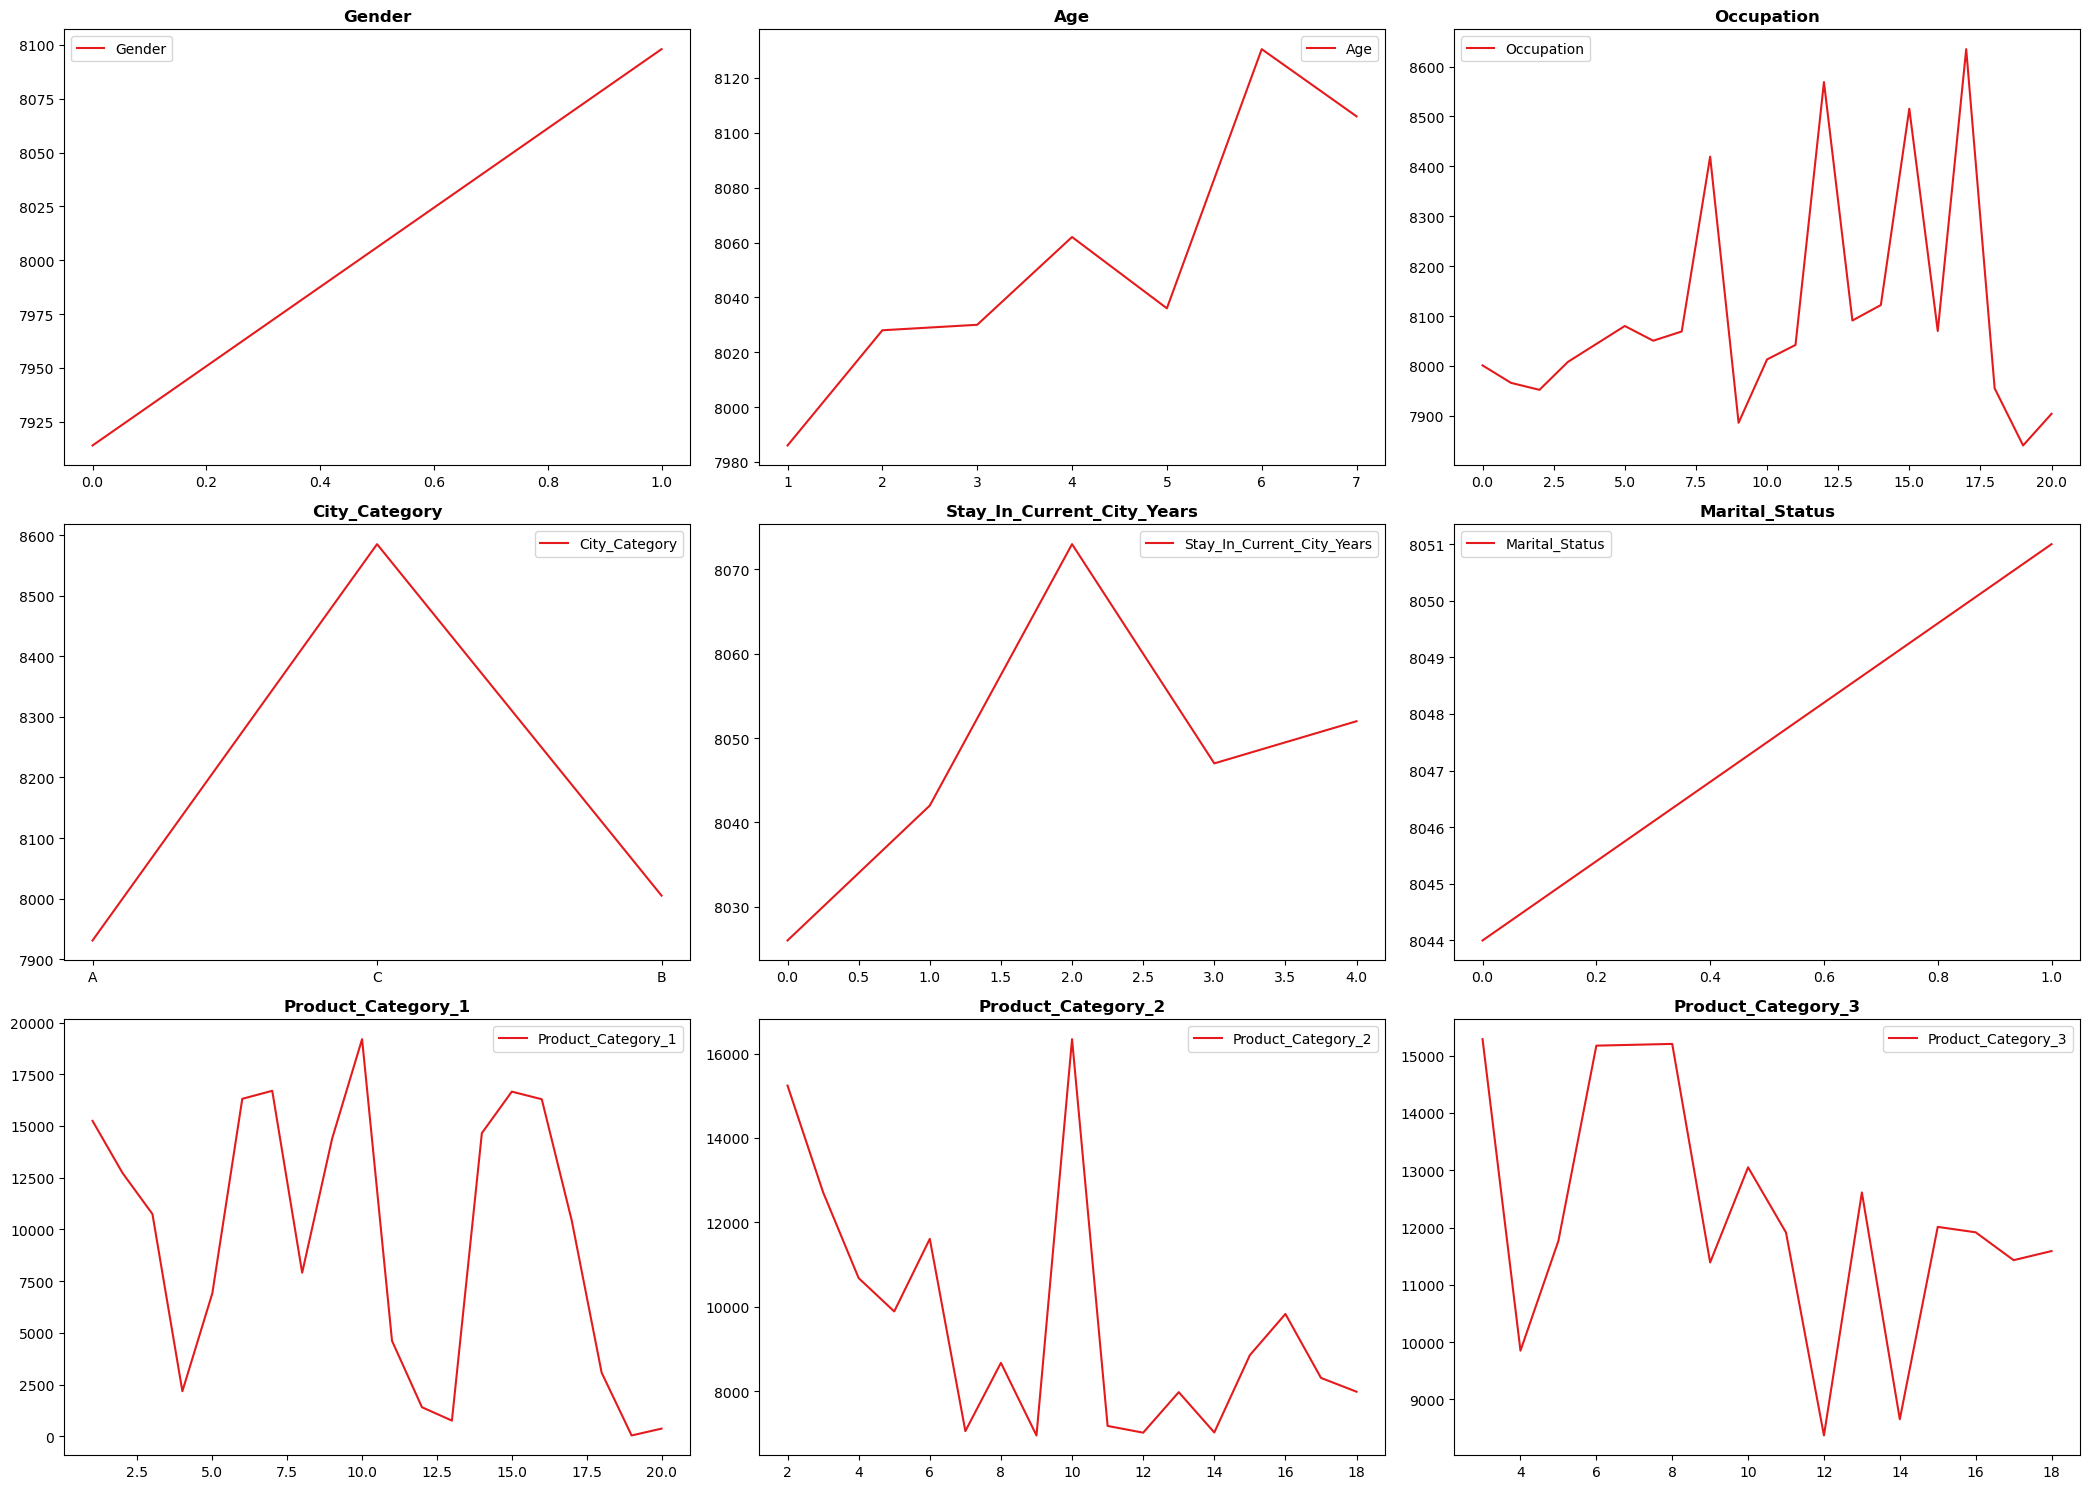

>> Note: 
	 The medain purchase price when cat-2 is not know/not avilable is: 7075.0
	 The medain purchase price when cat-3 is not know/not avilable is: 7451.0


In [365]:
print('Variation of median purchase price across each category in a feature: \n')
fig, axis = plt.subplots(3,3, figsize=(21,15))

all_cols = list(median_purchase_prices.keys())
for i, ax in enumerate(axis.flatten()):
    if i < len(median_purchase_prices.keys()):
        median_price_df = pd.DataFrame.from_dict(median_purchase_prices[all_cols[i]], orient='index', columns=[all_cols[i]])
        sns.lineplot(data=median_price_df, ax=ax, palette='Set1')
        ax.set_title(all_cols[i], fontsize=12, fontweight='bold') 
plt.tight_layout()
plt.show()

print('>> Note: \n\t', f'The medain purchase price when cat-2 is not know/not avilable is: {where_cat2NotKnown}')
print('\t', f'The medain purchase price when cat-3 is not know/not avilable is: {where_cat3NotKnown}')